# Descriptive Statistics

In [1]:
import pandas as pd

def dataset_details(dataset_path):
    # Load the dataset into a Pandas DataFrame
    df = pd.read_csv(dataset_path)  # Change the function accordingly if your dataset is in a different format
    
    # Display basic information about the dataset
    print("Dataset shape:", df.shape)
    print("\nColumn names:", df.columns.tolist())
    print("\nData types:\n", df.dtypes)
    print("\nSummary statistics:\n", df.describe())
    print("\nMissing values:\n", df.isnull().sum())

# Specify the path to your dataset file
dataset_path = "IrelandTourismDataSet.csv"  # Change this to the path of your dataset file
dataset_details(dataset_path)


Dataset shape: (1150, 19)

Column names: ['STATISTIC', 'STATISTIC Label', 'TLIST(A1)', 'Year', 'C03622V04362', 'Country', 'C02293V02763', 'Direction', 'UNIT', 'Average Length of Stay', 'Leisure (%)', 'Business (%)', 'Visiting Friends/Relatives (%)', 'Other (%)', 'Air (%)', 'Sea (%)', 'Land (%)', 'VALUE', 'Tourism Revenue (Million EUR)']

Data types:
 STATISTIC                          object
STATISTIC Label                    object
TLIST(A1)                         float64
Year                              float64
C03622V04362                       object
Country                            object
C02293V02763                      float64
Direction                          object
UNIT                               object
Average Length of Stay              int64
Leisure (%)                         int64
Business (%)                        int64
Visiting Friends/Relatives (%)      int64
Other (%)                           int64
Air (%)                             int64
Sea (%)          

# Plot Graphs to Visualize Dataset and Summary Statistics

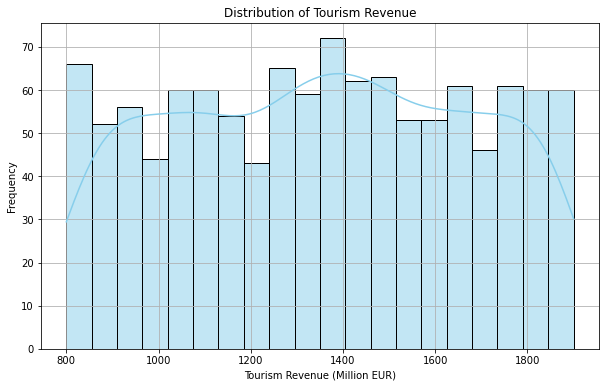

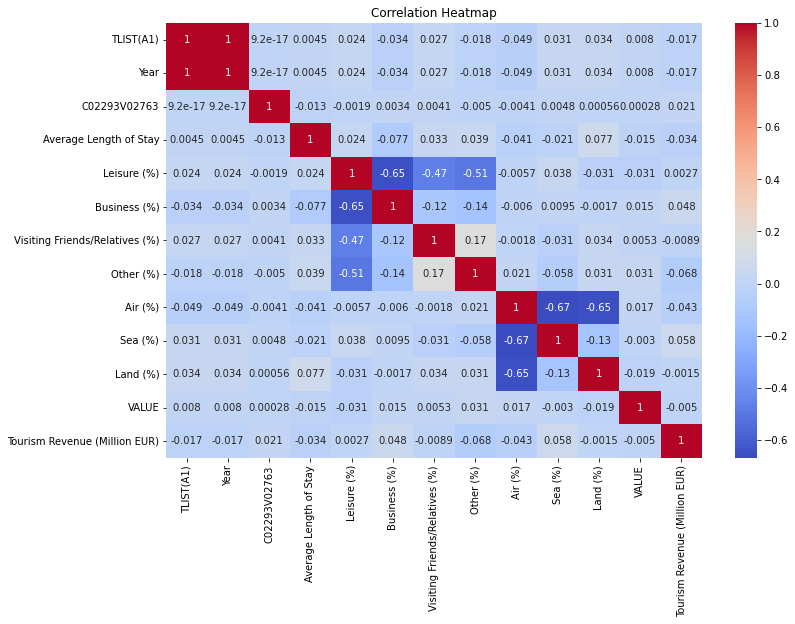

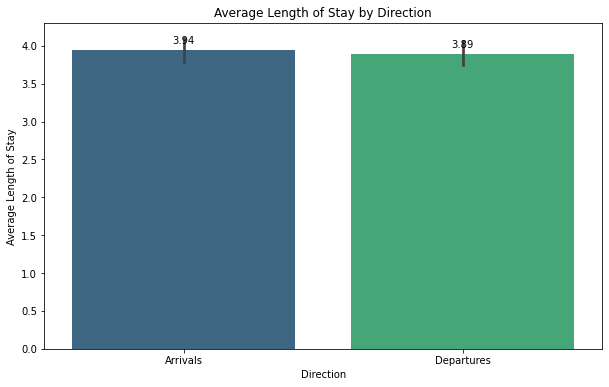

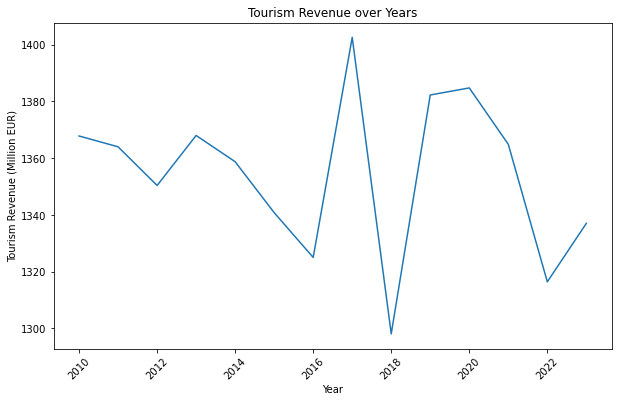

Summary Statistics:
        TLIST(A1)        Year  C02293V02763  Average Length of Stay  \
count  1120.00000  1120.00000   1120.000000             1150.000000   
mean   2016.50000  2016.50000      1.500000                3.928696   
std       4.03293     4.03293      0.500223                1.996113   
min    2010.00000  2010.00000      1.000000                1.000000   
25%    2013.00000  2013.00000      1.000000                2.000000   
50%    2016.50000  2016.50000      1.500000                4.000000   
75%    2020.00000  2020.00000      2.000000                6.000000   
max    2023.00000  2023.00000      2.000000                7.000000   

       Leisure (%)  Business (%)  Visiting Friends/Relatives (%)    Other (%)  \
count  1150.000000   1150.000000                     1150.000000  1150.000000   
mean     49.270435     25.646957                       12.146087    12.936522   
std      27.571553     21.573133                       12.898393    14.672887   
min       2.0000

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("IrelandTourismDataSet.csv")  # Replace "your_dataset.csv" with the actual path to your dataset file

# Descriptive Statistics
summary_stats = df.describe()

# Plot 1: Distribution of Tourism Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df["Tourism Revenue (Million EUR)"], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Tourism Revenue')
plt.xlabel('Tourism Revenue (Million EUR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot 2: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot 3: Bar Plot of Average Length of Stay by Direction
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Direction', y='Average Length of Stay', data=df, palette='viridis')
plt.title('Average Length of Stay by Direction')
plt.xlabel('Direction')
plt.ylabel('Average Length of Stay')

# Adding values over the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# Plot 4: # Line Plot of Tourism Revenue over Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Tourism Revenue (Million EUR)', data=df, ci=None)
plt.title('Tourism Revenue over Years')
plt.xlabel('Year')
plt.ylabel('Tourism Revenue (Million EUR)')
plt.xticks(rotation=45)
plt.show()

# Critical Analysis
# Summary Statistics
print("Summary Statistics:")
print(summary_stats)


